In [76]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import create_report

In [77]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

full_palette = custom_colors + complementary_colors
sns.set_palette(full_palette)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

In [78]:
def get_category(score, mean, std):
    if score < mean-0.5*std:
        return "Below average"
    if score > mean+0.5*std:
        return "Above average"
    return "Average"

# Read and merge all data

In [79]:
df = pd.read_csv('../data/lifesnaps/daily_fitbit_sema_df_unprocessed.csv')
df

,Unnamed: 0,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7406,7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7407,7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7408,7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df = df.drop(columns=['Unnamed: 0', 'step_goal', 'min_goal', 'max_goal', 'step_goal_label', 'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'SAD', 'TIRED', 'ENTERTAINMENT', 'GYM','HOME', 'HOME_OFFICE', 'OTHER', 'OUTDOORS', 'TRANSIT', 'WORK/SCHOOL'])
df.rename(columns={'TENSE/ANXIOUS': 'label_stress_sema'}, inplace=True)
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,label_stress_sema
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19,NaN
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,1.197531,9727.0,56.0,1374.0,4.0,0.0,<30,MALE,<19,0.0
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,1.670732,8253.0,85.0,1350.0,0.0,0.0,<30,MALE,<19,0.0
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,1.588235,9015.0,90.0,1282.0,0.0,0.0,<30,MALE,<19,0.0
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,1.090909,12949.0,146.0,1274.0,4.0,0.0,<30,MALE,<19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,621e362467b776a2404ad513,2021-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7406,621e36f967b776a240e5e7c9,2021-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7407,621e362467b776a2404ad513,2021-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7408,621e339967b776a240e502de,2021-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [81]:
# select only the experiment dates
df = df.sort_values(by='date', ascending=True)
df['date'] = pd.to_datetime(df['date'].astype("str"), format='%Y-%m-%d')
df = df.loc[((df['date'] > '2021-05-23') & (df['date'] < '2021-07-27')) | ((df['date'] > '2021-11-14') & (df['date'] < '2022-01-18'))]
df.reset_index(inplace=True, drop=True)
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,label_stress_sema
0,621e332267b776a24092a584,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21284.0,175.0,1130.0,9.0,0.0,<30,MALE,21.0,NaN
1,621e30e467b776a240e817c7,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6506.0,105.0,703.0,64.0,2.0,<30,MALE,>=30,1.0
2,621e367e67b776a24087d75d,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4827.0,120.0,1319.0,0.0,0.0,NaN,MALE,NaN,NaN
3,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.65,...,NaN,7493.0,127.0,1306.0,7.0,0.0,>=30,FEMALE,<19,NaN
4,621e2f6167b776a240e082a9,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6441.0,82.0,1306.0,2.0,0.0,>=30,FEMALE,>=25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,621e300767b776a2404dc717,2022-01-17,33.186399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.742857,2223.0,19.0,1380.0,4.0,0.0,<30,MALE,29.0,NaN
4905,621e309b67b776a240b532b0,2022-01-17,31.815133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.066667,12096.0,129.0,1208.0,6.0,0.0,>=30,MALE,23.0,NaN
4906,621e342e67b776a2404ce460,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.0,0.0,7.0,0.0,0.0,<30,MALE,29.0,NaN
4907,621e309267b776a240ae1cdb,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,<30,MALE,<19,NaN


In [82]:
panas = pd.read_csv('../data/lifesnaps/panas.csv')
panas = panas.rename(columns={"user_id": "id", "submitdate": "date", "negative_affect_score":"label_panas_negative_affect", "positive_affect_score":"label_panas_positive_affect"})
panas["date"] = pd.to_datetime(pd.to_datetime(panas["date"]).dt.date)
panas = panas.sort_values(by='date', ascending=True)
panas = panas.drop(columns=['Unnamed: 0', 'type'])
panas

,id,date,label_panas_positive_affect,label_panas_negative_affect
133,621e329067b776a2402ffad2,2021-05-31,30,23
131,621e328667b776a240281372,2021-05-31,40,28
146,621e32af67b776a24045b4cf,2021-05-31,32,33
80,621e301e67b776a240608a72,2021-05-31,40,24
153,621e32d967b776a240627414,2021-05-31,35,24
...,...,...,...,...
187,621e339967b776a240e502de,2022-01-12,45,13
43,621e2f9167b776a240011ccb,2022-01-16,43,31
249,621e367e67b776a24087d75d,2022-01-17,27,21
122,621e324e67b776a2400191cb,2022-01-17,45,10


In [83]:
df = df.merge(panas, how='left', on=['id','date'])
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,label_stress_sema,label_panas_positive_affect,label_panas_negative_affect
0,621e332267b776a24092a584,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,175.0,1130.0,9.0,0.0,<30,MALE,21.0,NaN,NaN,NaN
1,621e30e467b776a240e817c7,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.0,703.0,64.0,2.0,<30,MALE,>=30,1.0,NaN,NaN
2,621e367e67b776a24087d75d,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.0,1319.0,0.0,0.0,NaN,MALE,NaN,NaN,NaN,NaN
3,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.65,...,127.0,1306.0,7.0,0.0,>=30,FEMALE,<19,NaN,NaN,NaN
4,621e2f6167b776a240e082a9,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.0,1306.0,2.0,0.0,>=30,FEMALE,>=25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,621e300767b776a2404dc717,2022-01-17,33.186399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,1380.0,4.0,0.0,<30,MALE,29.0,NaN,NaN,NaN
4905,621e309b67b776a240b532b0,2022-01-17,31.815133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.0,1208.0,6.0,0.0,>=30,MALE,23.0,NaN,NaN,NaN
4906,621e342e67b776a2404ce460,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.0,0.0,0.0,<30,MALE,29.0,NaN,NaN,NaN
4907,621e309267b776a240ae1cdb,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,<30,MALE,<19,NaN,NaN,NaN


In [84]:
stai = pd.read_csv('../data/lifesnaps/stai.csv')
stai = stai.rename(columns={"user_id": "id", "submitdate": "date", "stai_stress":"label_stai_stress"})
stai["date"] = pd.to_datetime(pd.to_datetime(stai["date"]).dt.date)
stai = stai.sort_values(by='date', ascending=True)
stai = stai.drop(columns=['type', 'stai_stress_category', 'Unnamed: 0'])
stai

,id,date,label_stai_stress
0,621e2e8e67b776a24055b564,2021-05-31,45.0
140,621e328667b776a240281372,2021-05-31,48.0
142,621e329067b776a2402ffad2,2021-05-31,55.0
105,621e30e467b776a240e817c7,2021-05-31,52.0
155,621e32af67b776a24045b4cf,2021-05-31,52.0
...,...,...,...
224,621e346f67b776a24081744f,2022-01-12,49.0
48,621e2f9167b776a240011ccb,2022-01-16,59.0
255,621e367e67b776a24087d75d,2022-01-17,47.0
133,621e324e67b776a2400191cb,2022-01-17,51.0


In [85]:
df = df.merge(stai, how='left', on=['id','date'])
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,label_stress_sema,label_panas_positive_affect,label_panas_negative_affect,label_stai_stress
0,621e332267b776a24092a584,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1130.0,9.0,0.0,<30,MALE,21.0,NaN,NaN,NaN,NaN
1,621e30e467b776a240e817c7,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,703.0,64.0,2.0,<30,MALE,>=30,1.0,NaN,NaN,NaN
2,621e367e67b776a24087d75d,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1319.0,0.0,0.0,NaN,MALE,NaN,NaN,NaN,NaN,NaN
3,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.65,...,1306.0,7.0,0.0,>=30,FEMALE,<19,NaN,NaN,NaN,NaN
4,621e2f6167b776a240e082a9,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1306.0,2.0,0.0,>=30,FEMALE,>=25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,621e300767b776a2404dc717,2022-01-17,33.186399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1380.0,4.0,0.0,<30,MALE,29.0,NaN,NaN,NaN,NaN
4905,621e309b67b776a240b532b0,2022-01-17,31.815133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1208.0,6.0,0.0,>=30,MALE,23.0,NaN,NaN,NaN,NaN
4906,621e342e67b776a2404ce460,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,0.0,0.0,<30,MALE,29.0,NaN,NaN,NaN,NaN
4907,621e309267b776a240ae1cdb,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,<30,MALE,<19,NaN,NaN,NaN,NaN


In [86]:
df.columns

Index(['id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'badgeType', 'calories',
       'filteredDemographicVO2Max', 'distance', 'activityType', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'label_stress_sema', 'label_panas_positive_affect',
       'label_panas_negative_affe

(array([45., 36., 54., 32., 37., 15., 19., 10.,  6.,  2.]),
 array([10. , 13.5, 17. , 20.5, 24. , 27.5, 31. , 34.5, 38. , 41.5, 45. ]),
 <BarContainer object of 10 artists>)

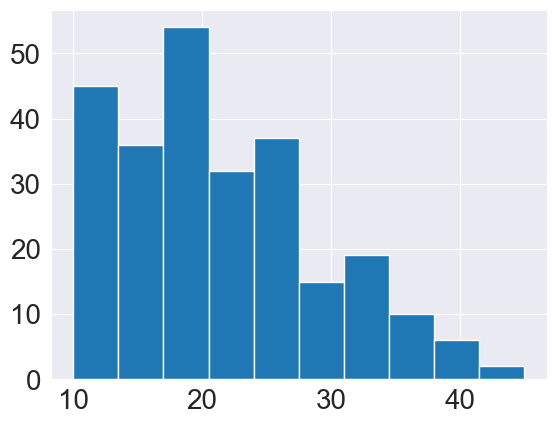

In [87]:
plt.hist(df.label_panas_negative_affect)

In [88]:
mean_panas = df['label_panas_negative_affect'].mean()
std_panas = df['label_panas_negative_affect'].std()
df['negative_affect_category'] = df['label_panas_negative_affect'].apply(lambda score: get_category(score, mean_panas, std_panas))
print("Mean PANAS: {} - STD PANAS: {}".format(mean_panas, std_panas))

Mean PANAS: 21.29296875 - STD PANAS: 7.611917215851759


(array([4738.,    0.,    0.,    0.,    0.,   98.,    0.,    0.,    0.,
          73.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

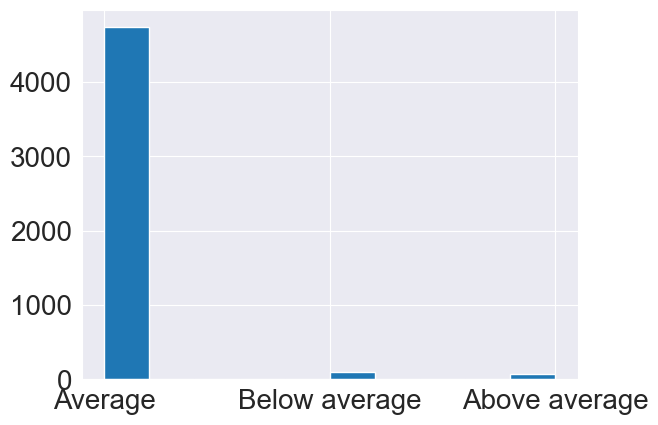

In [89]:
plt.hist(df.negative_affect_category)

(array([ 1.,  1.,  8., 11., 15., 49., 64., 73., 32., 13.]),
 array([26. , 29.4, 32.8, 36.2, 39.6, 43. , 46.4, 49.8, 53.2, 56.6, 60. ]),
 <BarContainer object of 10 artists>)

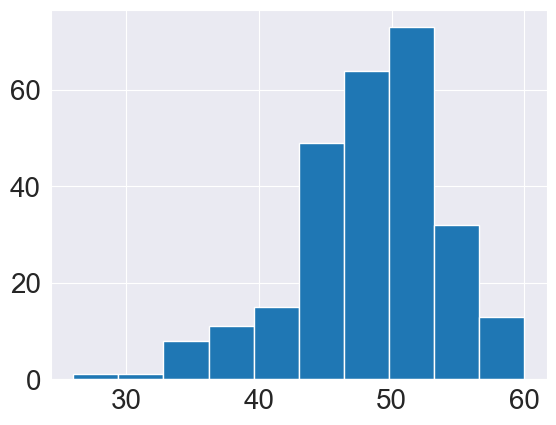

In [90]:
plt.hist(df.label_stai_stress)

In [91]:
mean_panas = df['label_stai_stress'].mean()
std_panas = df['label_stai_stress'].std()
df['stai_stress_category'] = df['label_stai_stress'].apply(lambda score: get_category(score, mean_panas, std_panas))
print("Mean STAI stress: {} - STD STAI stress: {}".format(mean_panas, std_panas))

Mean STAI stress: 48.30711610486891 - STD STAI stress: 5.561284159392198


(array([4757.,    0.,    0.,    0.,    0.,   77.,    0.,    0.,    0.,
          75.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

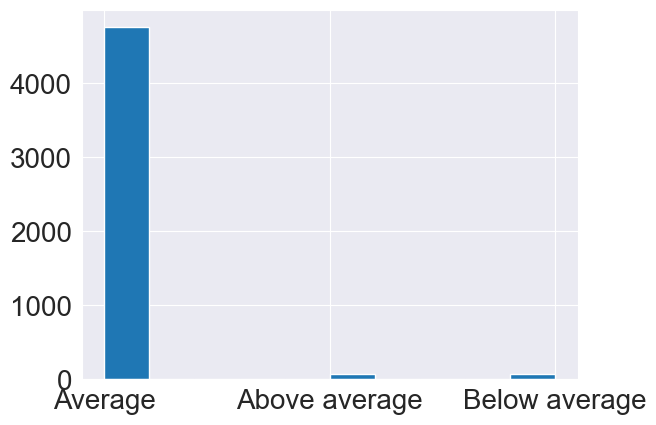

In [92]:
plt.hist(df.stai_stress_category)

In [93]:
df.columns

Index(['id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'badgeType', 'calories',
       'filteredDemographicVO2Max', 'distance', 'activityType', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'label_stress_sema', 'label_panas_positive_affect',
       'label_panas_negative_affe

In [94]:
df = df.drop(columns=['label_panas_positive_affect', 'label_panas_negative_affect', 'label_stai_stress'])

In [95]:
df.to_pickle('../data/lifesnaps/lifesnapsv1.pkl')

In [96]:
#create_report(df).show_browser()

# Basic Preprocessing

In [97]:
def sin_transform(values):
    """
    Applies SIN transform to a series value.
    Args:
        values (pd.Series): A series to apply SIN transform on.
    Returns
        (pd.Series): The transformed series.
    """

    return np.sin(2 * np.pi * values / len(set(values)))


def cos_transform(values):
    """
    Applies COS transform to a series value.
    Args:
        values (pd.Series): A series to apply SIN transform on.
    Returns
        (pd.Series): The transformed series.
    """
    return np.cos(2 * np.pi * values / len(set(values)))


def date_engineering(data):  # data could be any dataframe that needs date engineering

    data['date'] = pd.to_datetime(data.date, format='%m/%d/%y %H:%M:%S')
    data = data.astype({"date": str})

    # Extract features from date
    data["year"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
    data["month"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
    data["weekday"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())
    data["week"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').isocalendar()[1])
    data["day"] = data["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)

    # Sin transformation in date features
    data["month_sin"] = sin_transform(data["month"])
    data["weekday_sin"] = sin_transform(data["weekday"])
    data["week_sin"] = sin_transform(data["week"])
    data["day_sin"] = sin_transform(data["day"])

    # Cosine transformation in date features
    data["month_cos"] = cos_transform(data["month"])
    data["weekday_cos"] = cos_transform(data["weekday"])
    data["week_cos"] = cos_transform(data["week"])
    data["day_cos"] = cos_transform(data["day"])

    data = data.drop(columns=['year', 'month', 'weekday', 'week', 'day'])

    return data

In [98]:
df = date_engineering(df)
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,negative_affect_category,stai_stress_category,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e332267b776a24092a584,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
1,621e30e467b776a240e817c7,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
2,621e367e67b776a24087d75d,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
3,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.65,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
4,621e2f6167b776a240e082a9,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,621e300767b776a2404dc717,2022-01-17,33.186399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Average,Average,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4905,621e309b67b776a240b532b0,2022-01-17,31.815133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Average,Average,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4906,621e342e67b776a2404ce460,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Average,Average,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4907,621e309267b776a240ae1cdb,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Average,Average,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139


In [99]:
df.columns

Index(['id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'badgeType', 'calories',
       'filteredDemographicVO2Max', 'distance', 'activityType', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'label_stress_sema', 'negative_affect_category',
       'stai_stress_category', 'mont

In [100]:
#create_report(df).show_browser()

In [101]:
label_columns = ['label_stress_sema', 'label_panas_positive_affect',
       'label_panas_negative_affect', 'label_stai_stress']

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Exclude label columns from numerical and categorical lists
numerical_cols = [col for col in numerical_cols if col not in label_columns]
categorical_cols = [col for col in categorical_cols if col not in label_columns]

# Ensure 'id' is not in these lists
if 'id' in numerical_cols:
    numerical_cols.remove('id')
    
if 'id' in categorical_cols:
    categorical_cols.remove('id')

# 1. For numerical columns:
for col in numerical_cols:
    df[col] = df.groupby('id')[col].transform(lambda x: x.fillna(x.median()))
    df[col].fillna(df[col].median(), inplace=True)

# 2. For categorical columns:
for col in categorical_cols:
    mode = df.groupby('id')[col].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else x)
    df[col] = df[col].fillna(mode)
    df[col].fillna(df[col].mode().iloc[0], inplace=True)
    
df

C:\Users\ChristinaKaragianni\anaconda3\envs\py38\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ChristinaKaragianni\anaconda3\envs\py38\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ChristinaKaragianni\anaconda3\envs\py38\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ChristinaKaragianni\anaconda3\envs\py38\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ChristinaKaragianni\anaconda3\envs\py38\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ChristinaKaragianni\anaconda3\e

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,negative_affect_category,stai_stress_category,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,621e332267b776a24092a584,2021-05-24,34.036874,57.4370,37.914,95.60,17.2,0.0,0.000000,0.000,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
1,621e30e467b776a240e817c7,2021-05-24,33.274919,52.5365,38.161,94.50,17.2,0.0,0.000000,0.000,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
2,621e367e67b776a24087d75d,2021-05-24,33.019585,62.9565,32.762,96.00,12.0,72.0,0.733333,0.700,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
3,621e360b67b776a24039709f,2021-05-24,34.175203,68.3210,31.413,96.00,15.4,69.0,0.633333,0.650,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
4,621e2f6167b776a240e082a9,2021-05-24,34.892637,62.5580,24.507,97.20,13.0,68.0,0.666667,0.625,...,Average,Average,-0.866025,0.0,0.309017,-0.988468,0.5,1.0,0.951057,0.151428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,621e300767b776a2404dc717,2022-01-17,33.186399,62.3900,34.057,95.85,15.0,72.0,0.733333,0.700,...,Average,Average,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4905,621e309b67b776a240b532b0,2022-01-17,31.815133,62.3900,34.057,96.00,15.0,72.0,0.733333,0.700,...,Average,Average,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4906,621e342e67b776a2404ce460,2022-01-17,33.864390,51.0640,80.576,96.00,17.2,66.0,0.533333,0.650,...,Average,Average,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139
4907,621e309267b776a240ae1cdb,2022-01-17,34.121912,62.3900,34.057,96.00,15.0,72.0,0.733333,0.700,...,Average,Average,0.866025,0.0,0.809017,-0.299363,0.5,1.0,0.587785,-0.954139


In [102]:
#create_report(df).show_browser()

In [103]:
df.columns

Index(['id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'badgeType', 'calories',
       'filteredDemographicVO2Max', 'distance', 'activityType', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'label_stress_sema', 'negative_affect_category',
       'stai_stress_category', 'mont

In [104]:
def parse_bmi(bmi):
    if isinstance(bmi, str):
        if bmi == '<19':
            return 18.0
        elif bmi == '>=30':
            return 30.0
        elif bmi == '>=25':
            return 25.0
        else:
            return float(bmi)
    return bmi

def one_hot_encoding(fitbit):
    # List columns that we expect to be in the dataframe and need one-hot encoding
    categorical_columns = ['badgeType', 'activityType']
    
    for col in categorical_columns:
        if col in fitbit.columns:
            # Get one-hot encoding of the column
            one_hot = pd.get_dummies(fitbit[col], prefix=col)
            # Drop the original column
            fitbit = fitbit.drop(col, axis=1)
            # Join the one-hot encoded dataframe
            fitbit = fitbit.join(one_hot)
    
    # Replace other categorical columns if they exist in the dataframe
    if 'mindfulness_session' in fitbit.columns:
        fitbit['mindfulness_session'].replace(to_replace=['False', True], value=[0, 1], inplace=True)
    
    if 'age' in fitbit.columns:
        fitbit['age'].replace(to_replace=['<30', '>=30'], value=[0, 1], inplace=True)

    if 'gender' in fitbit.columns:
        fitbit['gender'].replace(to_replace=['MALE', 'FEMALE'], value=[0, 1], inplace=True)
    
    if 'heart_rate_alert' in fitbit.columns:
        fitbit['heart_rate_alert'].replace(to_replace=['NONE', 'LOW_HR'], value=[0, 1], inplace=True)

    # Update bmi column
    if 'bmi' in fitbit.columns:
        fitbit['bmi'] = fitbit.bmi.apply(parse_bmi)
        fitbit['bmi'] = fitbit.bmi.apply(lambda bmi: 0 if bmi < 18.5 else (1 if bmi < 25 else (2 if bmi < 30 else 3)))
         # 0: Underweight, 1: Normal, 2: Overweight, 3: Obese
    
    return fitbit

In [105]:
df = parse_bmi(df)
df = one_hot_encoding(df)
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,"activityType_['Workout', 'Bike']","activityType_['Workout', 'Hike', 'Walk']","activityType_['Workout', 'Treadmill', 'Walk']","activityType_['Workout', 'Walk', 'Bike']","activityType_['Workout', 'Walk']",activityType_['Workout'],"activityType_['Yoga/Pilates', 'Sport']","activityType_['Yoga/Pilates', 'Walk']","activityType_['Yoga/Pilates', 'Workout']",activityType_['Yoga/Pilates']
0,621e332267b776a24092a584,2021-05-24,34.036874,57.4370,37.914,95.60,17.2,0.0,0.000000,0.000,...,0,0,0,0,0,0,0,0,0,0
1,621e30e467b776a240e817c7,2021-05-24,33.274919,52.5365,38.161,94.50,17.2,0.0,0.000000,0.000,...,0,0,0,0,0,0,0,0,0,0
2,621e367e67b776a24087d75d,2021-05-24,33.019585,62.9565,32.762,96.00,12.0,72.0,0.733333,0.700,...,0,0,0,0,0,0,0,0,0,0
3,621e360b67b776a24039709f,2021-05-24,34.175203,68.3210,31.413,96.00,15.4,69.0,0.633333,0.650,...,0,0,0,0,0,0,0,0,0,0
4,621e2f6167b776a240e082a9,2021-05-24,34.892637,62.5580,24.507,97.20,13.0,68.0,0.666667,0.625,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,621e300767b776a2404dc717,2022-01-17,33.186399,62.3900,34.057,95.85,15.0,72.0,0.733333,0.700,...,0,0,0,0,0,0,0,0,0,0
4905,621e309b67b776a240b532b0,2022-01-17,31.815133,62.3900,34.057,96.00,15.0,72.0,0.733333,0.700,...,0,0,0,0,0,0,0,0,0,0
4906,621e342e67b776a2404ce460,2022-01-17,33.864390,51.0640,80.576,96.00,17.2,66.0,0.533333,0.650,...,0,0,0,0,0,0,0,0,0,0
4907,621e309267b776a240ae1cdb,2022-01-17,34.121912,62.3900,34.057,96.00,15.0,72.0,0.733333,0.700,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df.to_pickle('../data/lifesnaps/lifesnapsv2.pkl')

In [107]:
#create_report(df).show_browser()